# Teste Z para uma amostra

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
enem_sp = pd.read_csv('data/enem_2019-tratado.csv', sep=',', encoding='iso-8859-1') 

In [3]:
enem_sp

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,nao_respondeu,NaN,...,600.2,ingles,1.0,160.0,200.0,180.0,200.0,200.0,940.0,sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,ingles,1.0,160.0,120.0,200.0,200.0,200.0,880.0,nao
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,publica,35904958.0,...,393.2,1,1.0,80.0,160.0,120.0,100.0,100.0,560.0,sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,publica,NaN,...,419.2,ingles,1.0,120.0,120.0,120.0,120.0,80.0,560.0,sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,nao_respondeu,NaN,...,796.1,ingles,1.0,160.0,200.0,180.0,180.0,160.0,880.0,sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499935,"1,90E+11",São Paulo,18,F,1,parda,1,1,nao_respondeu,NaN,...,479.1,1,1.0,100.0,120.0,120.0,140.0,100.0,580.0,sim
499936,"1,90E+11",São Paulo,17,F,1,preta,1,2,publica,35925457.0,...,43.2,1,1.0,80.0,120.0,140.0,120.0,100.0,560.0,sim
499937,"1,90E+11",São Paulo,17,F,1,parda,1,2,publica,35001156.0,...,487.3,ingles,1.0,120.0,80.0,60.0,120.0,0.0,380.0,sim
499938,"1,90E+11",São Paulo,17,M,1,parda,1,2,publica,NaN,...,401.1,ingles,1.0,160.0,120.0,160.0,140.0,160.0,740.0,nao


In [4]:
colegiox = enem_sp.loc[enem_sp.CO_ESCOLA == 35017632.0]

In [5]:
colegiox.shape

(41, 28)

In [6]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,publica,35017632.0,...,537.1,ingles,1.0,120.0,40.0,40.0,120.0,20.0,340.0,sim
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,publica,35017632.0,...,451.9,ingles,1.0,140.0,120.0,140.0,160.0,160.0,720.0,nao
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,publica,35017632.0,...,506.4,1,1.0,120.0,120.0,120.0,120.0,80.0,560.0,nao
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,publica,35017632.0,...,59.5,ingles,1.0,120.0,120.0,120.0,120.0,40.0,520.0,sim
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,publica,35017632.0,...,510.6,1,1.0,120.0,120.0,120.0,140.0,140.0,640.0,sim


1) Analisar a calssificação de variáveis

In [7]:
colegiox.dtypes

NU_INSCRICAO                object
NO_MUNICIPIO_RESIDENCIA     object
IDADE                        int64
SEXO                        object
TP_ESTADO_CIVIL              int64
RACA                        object
TP_NACIONALIDADE             int64
TP_ST_CONCLUSAO              int64
ESCOLA                      object
CO_ESCOLA                  float64
NO_MUNICIPIO_ESC            object
TP_PRESENCA_CN               int64
TP_PRESENCA_CH               int64
TP_PRESENCA_LC               int64
TP_PRESENCA_MT               int64
NOTA_CN                    float64
NOTA_CH                    float64
NOTA_LC                    float64
NOTA_MT                    float64
TP_LINGUA                   object
TP_STATUS_REDACAO          float64
COMP1                      float64
COMP2                      float64
COMP3                      float64
COMP4                      float64
COMP5                      float64
NOTA_REDACAO               float64
INTERNET                    object
dtype: object

2) Analisar valores missing

In [8]:
colegiox.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
IDADE                      0
SEXO                       0
TP_ESTADO_CIVIL            0
RACA                       0
TP_NACIONALIDADE           0
TP_ST_CONCLUSAO            0
ESCOLA                     0
CO_ESCOLA                  0
NO_MUNICIPIO_ESC           0
TP_PRESENCA_CN             0
TP_PRESENCA_CH             0
TP_PRESENCA_LC             0
TP_PRESENCA_MT             0
NOTA_CN                    0
NOTA_CH                    0
NOTA_LC                    0
NOTA_MT                    0
TP_LINGUA                  0
TP_STATUS_REDACAO          0
COMP1                      0
COMP2                      0
COMP3                      0
COMP4                      0
COMP5                      0
NOTA_REDACAO               0
INTERNET                   0
dtype: int64

3) Analisar outliers

In [9]:
import plotly.express as px

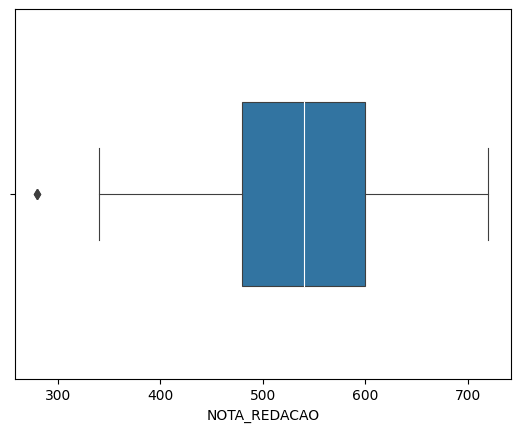

In [21]:
sns.boxplot(colegiox, x="NOTA_REDACAO",
            saturation=0.75, width=0.5, linewidth=0.8, medianprops={"color": "white"});

4) Analisar Normalidade

<AxesSubplot: xlabel='NOTA_REDACAO', ylabel='Probability'>

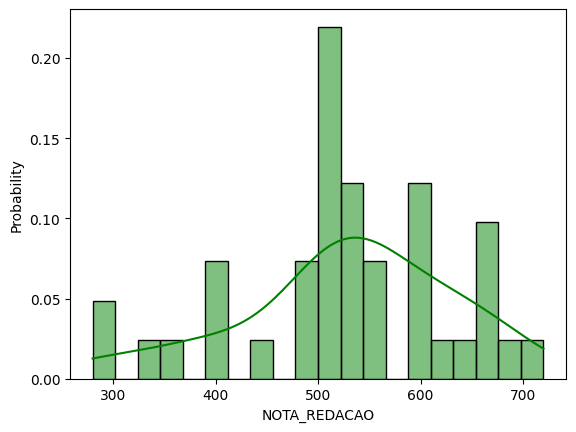

In [11]:
sns.histplot(colegiox, x='NOTA_REDACAO', bins=20, color='green', kde=True, stat='probability')

In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt

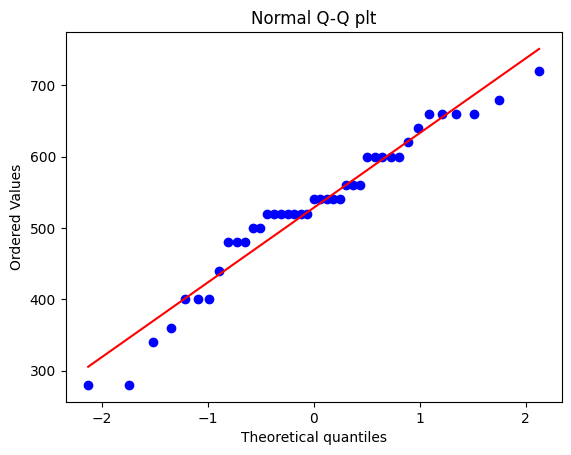

In [13]:
stats.probplot(colegiox['NOTA_REDACAO'], dist='norm', plot=plt)
plt.title("Normal Q-Q plt")
plt.show()

#### Critérios:
Nível de significância de 0,05 ou 5% (mais utilizado)
<br>Quando p > 0.05 (dist. normal)

In [14]:
stats.shapiro(colegiox.NOTA_REDACAO)

ShapiroResult(statistic=0.9529756903648376, pvalue=0.08905091136693954)

In [15]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [16]:
statsmodels.stats.diagnostic.lilliefors(colegiox.NOTA_REDACAO, dist='norm')

(0.15115505856545197, 0.020310301942343047)

In [17]:
stats.anderson(colegiox.NOTA_REDACAO, 'norm')

AndersonResult(statistic=0.698461623735156, critical_values=array([0.532, 0.606, 0.727, 0.848, 1.009]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

# Teste Z

Média das notas do colégio X comparada com a média do estado de São Paulo

H0: média igual a SP - p > 0.05

Ha: média diferente a SP - p <= 0.05

In [18]:
from statsmodels.stats.weightstats import ztest

In [19]:
enem_sp.NOTA_REDACAO.describe()

count    499940.000000
mean        593.018322
std         170.536724
min           0.000000
25%         500.000000
50%         600.000000
75%         680.000000
max        1000.000000
Name: NOTA_REDACAO, dtype: float64

In [20]:
stat, p = ztest(colegiox.NOTA_REDACAO, value=593.018322)
print(f"Estatística de teste: {stat:.4f}")
print(f"P-valor: {p:.4f}")

Estatística de teste: -3.9844
P-valor: 0.0001


### Interpretação:
P-valor = 0.0001, então <= 0.05, a média diferente do estado de São Paulo, com um intervalo de confiança de 95%.